In [5]:
include("common.jl")

In [4]:
using DataFrames
using Gadfly
using PyPlot
using CurveFit
using Cairo
using FontConfig
using Distributions
using LaTeXStrings
# ignore the warnings

LoadError: ArgumentError: Module FontConfig not found in current path.
Run `Pkg.add("FontConfig")` to install the FontConfig package.

In [6]:
data  = readtable("Matrix_Info");

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in pointer_to_array(::Ptr{UInt32}, ::Tuple{Int64}, ::Bool) at ./deprecated.jl:50 (repeats 2 times)
 in unpack_pango_attr(::Ptr{Void}, ::Symbol) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:256
 in unpack_pango_attr_list(::Ptr{Void}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:348
 in (::Compose.##155#156{Base.RefValue{Ptr{Void}}})(::Base.AbstractIOBuffer{Array{UInt8,1}}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:386
 in #sprint#304(::Void, ::Function, ::Int64, ::Function) at ./strings/io.jl:37
 in pango_to_svg(::String) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:385
 in draw(::Compose.SVG, ::Compose.TextPrimitive{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}},Compose.Rotation{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}}, ::Int64) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/svg.jl:935
 in draw(::Compose.SVG, ::Compose.Form{Compose.

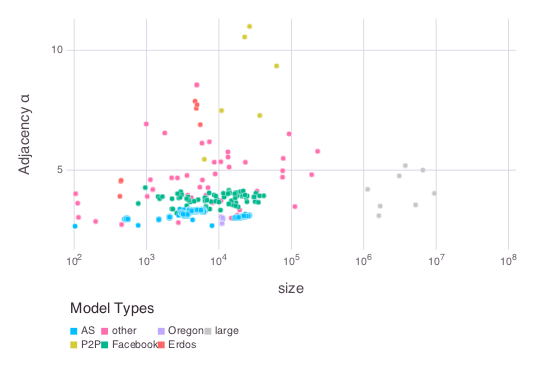

:mm,Float64}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/container.jl:477
 in drawpart(::Compose.SVG, ::Compose.Context, ::Compose.IdentityTransform, ::Compose.UnitBox{Float64,Float64,Float64,Float64}, ::Measures.BoundingBox{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/container.jl:590 (repeats 2 times)
 in draw(::Compose.SVG, ::Compose.Context) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/container.jl:434
 in show at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/Gadfly.jl:983 [inlined]
 in limitstringmime(::MIME{Symbol("image/svg+xml")}, ::Gadfly.Plot) at /Users/nicoleeikmeier/.julia/v0.5/IJulia/src/execute_request.jl:31
 in display_dict(::Gadfly.Plot) at /Users/nicoleeikmeier/.julia/v0.5/IJulia/src/execute_request.jl:48
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /User

In [17]:
#Plot deg vs adjacency, for models

filt = map!(x -> x & !isna(x), data[:adj_p] .>= 0.1) & (data[:types] .!= "model")

LL1 = data[filt,:]
LL1 = LL1[:, [:size, :adj_alpha, :types]]

push!(LL1, @data([1130000,4.2,"large"])) #youtube
push!(LL1, @data([1620000,3.1,"large"])) #flickr
push!(LL1, @data([1690000,3.5,"large"])) #skitter
push!(LL1, @data([3100000,4.76,"large"])) #orkut
push!(LL1, @data([3760000,5.19,"large"])) #patents
push!(LL1, @data([5200000,3.55,"large"])) #livejournal
push!(LL1, @data([9470000,4.03,"large"])) #wikipedia
push!(LL1, @data([6560000,5.0,"large"])) #friendster



model_degvsadj = Gadfly.plot(
layer(LL1, x="size",y="adj_alpha", color = "types", Geom.point, style(default_point_size = 2pt, highlight_width=0.3pt)),
#layer(x = x0, y = 2*x0-1, Geom.line),
#layer(x = x0, y = x0, Geom.line),
Theme(grid_strokedash=[], key_position = :bottom),
Guide.xlabel("size" ), 
Guide.ylabel("Adjacency α" ),
Scale.x_log10,
#Guide.title("Models"),
#Guide.annotation(compose(context(),Compose.text(6.5,10.5,"2α-1"),fill(colorant"deepskyblue"))),
#Guide.annotation(compose(context(),Compose.text(9.25,8,"α"),fill(colorant"deepskyblue"))),
Coord.Cartesian(xmin=2, ymin=2, xmax = 8),
Guide.colorkey("Model Types"))

In [9]:
@show head(LL1)

head(LL1) = 6×3 DataFrames.DataFrame
│ Row │ size    │ adj_alpha │ types │
├─────┼─────────┼───────────┼───────┤
│ 1   │ 25158.0 │ 3.10624   │ "AS"  │
│ 2   │ 18100.0 │ 3.00843   │ "AS"  │
│ 3   │ 20731.0 │ 3.082     │ "AS"  │
│ 4   │ 21734.0 │ 3.08806   │ "AS"  │
│ 5   │ 24491.0 │ 3.08613   │ "AS"  │
│ 6   │ 23001.0 │ 3.07584   │ "AS"  │


,size,adj_alpha,types
1,25158.0,3.10624,AS
2,18100.0,3.00843,AS
3,20731.0,3.082,AS
4,21734.0,3.08806,AS
5,24491.0,3.08613,AS
6,23001.0,3.07584,AS
